In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

k-Means on a randomly generated dataset

In [2]:
np.random.seed(0)

In [3]:
X, y = make_blobs(n_samples= 5000,
                  centers= [[4, 4], [-2, -1], [2, -3], [1, 1]],
                  cluster_std= 0.9)

In [4]:
X

array([[-1.82150565,  0.07098024],
       [ 2.16732621, -2.93199608],
       [ 0.8465158 , -3.26075305],
       ...,
       [ 3.29772603,  4.24400152],
       [-1.69503125, -0.29979681],
       [-1.64362141,  0.63035513]])

In [5]:
y

array([1, 2, 2, ..., 0, 1, 1])

In [6]:
len(X)

5000

In [7]:
type(X)

numpy.ndarray

In [8]:
len(y)

5000

In [9]:
type(y)

numpy.ndarray

In [10]:
X[0]

array([-1.82150565,  0.07098024])

In [11]:
X[0][0]

-1.8215056465801926

In [12]:
X[0][1]

0.07098024481624443

In [13]:
y[0]

1

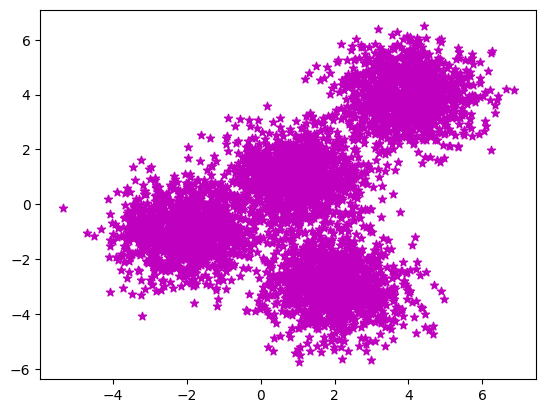

In [14]:
plt.scatter(x= X[:, 0], y= X[:, 1], marker= "*", color= "m")

In [15]:
k_means = KMeans(init= "k-means++",
                 n_clusters= 4,
                 n_init= 12)

In [16]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [17]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0])

In [18]:
k_means_cluster_center = k_means.cluster_centers_
k_means_cluster_center

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

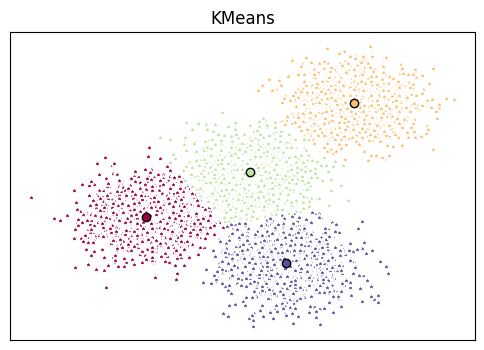

In [19]:
fig = plt.figure(figsize= (6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[4,4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_center[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='*')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())
plt.show()

*Practice*

In [20]:
k_means_3 = KMeans(init= "k-means++",
                   n_clusters= 3,
                   n_init= 12)

In [21]:
k_means_3.fit(X)

KMeans(n_clusters=3, n_init=12)

In [22]:
k_means_3_labels = k_means_3.labels_
k_means_3_labels

array([1, 2, 2, ..., 0, 1, 1])

In [23]:
k_means_3_cluster_center = k_means_3.cluster_centers_
k_means_3_cluster_center

array([[ 3.70503248,  3.70030577],
       [-0.8042542 , -0.16952334],
       [ 2.02030226, -2.94614399]])

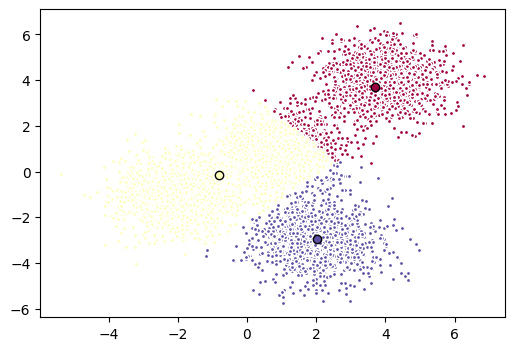

In [24]:
fig = plt.figure(figsize=(6, 4))

colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_3.labels_))))

ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len(k_means_3.cluster_centers_)), colors):
    my_members = (k_means_3.labels_ == k)
    cluster_center = k_means_3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

In [25]:
# Customer Segmentation with K-Means

In [26]:
!wget -O Cust_Segmentation.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [28]:
cust_df = pd.read_csv("Cust_Segmentation.csv")

In [29]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [30]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [31]:
cust_df.describe()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [32]:
df = cust_df.drop("Address", axis= 1)

In [33]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [34]:
X = df.values
X

array([[1.000e+00, 4.100e+01, 2.000e+00, ..., 1.073e+00, 0.000e+00,
        6.300e+00],
       [2.000e+00, 4.700e+01, 1.000e+00, ..., 8.218e+00, 0.000e+00,
        1.280e+01],
       [3.000e+00, 3.300e+01, 2.000e+00, ..., 5.802e+00, 1.000e+00,
        2.090e+01],
       ...,
       [8.480e+02, 2.500e+01, 4.000e+00, ..., 3.210e+00, 1.000e+00,
        3.340e+01],
       [8.490e+02, 3.200e+01, 1.000e+00, ..., 6.960e-01, 0.000e+00,
        2.900e+00],
       [8.500e+02, 5.200e+01, 1.000e+00, ..., 3.638e+00, 0.000e+00,
        8.600e+00]])

In [35]:
X = df.values[:, 1:]
X = np.nan_to_num(X)

In [36]:
Clus_dataset = StandardScaler().fit_transform(X)
Clus_dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [37]:
k_means = KMeans(init= "k-means++",
                 n_clusters= 3,
                 n_init= 12)

In [38]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

In [39]:
labels = k_means.labels_
labels

array([0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 2, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,

In [40]:
df["Clus_km"] = k_means.labels_ # df["Clus_km"] = labels

In [41]:
df.head(10)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,0
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,0
4,5,47,1,31,253,9.308,8.908,0.0,7.2,1
5,6,40,1,23,81,0.998,7.831,NaN,10.9,2
6,7,38,2,4,56,0.442,0.454,0.0,1.6,0
7,8,42,3,0,64,0.279,3.945,0.0,6.6,2
8,9,26,1,5,18,0.575,2.215,NaN,15.5,0
9,10,47,3,23,115,0.653,3.947,0.0,4.0,2


In [42]:
df.groupby("Clus_km").mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
1,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


Text(0, 0.5, 'Income')

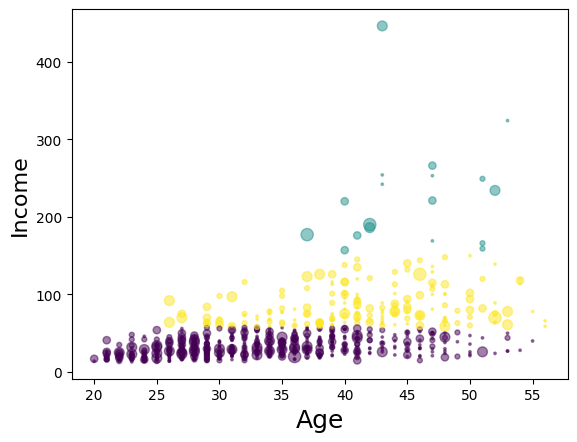

In [43]:
area = np.pi * (X[:, 1]) ** 2
plt.scatter(X[:, 0], X[:, 3], s= area, c= labels.astype(float), alpha= 0.5)
plt.xlabel("Age", fontsize= 18)
plt.ylabel("Income", fontsize= 16)